

---

#Redes Neurais Recorrentes e Embeddings
Implementações de Modelos 
---



In [ ]:
#Instalando Bibliotecas
!pip install gensim
# !pip install fsspec
!git clone https://github.com/lucasvbalves/nlp-pt-br-datasets.git
!pip install nltk==3.6.2
# !pip install spacy==3.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'nlp-pt-br-datasets'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 23 (delta 0), reused 23 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.2 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [ ]:
#Importando Bibliotecas
import nltk
import pandas as pd
import io
import re
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from keras.preprocessing import text, sequence
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from datetime import datetime as dt
from sklearn.metrics import classification_report
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.model_selection import train_test_split
import gensim
from sklearn import preprocessing
from tensorflow.keras import utils
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense,Input, BatchNormalization

###Etapa 1 - Geração do dataset

In [ ]:
#Importações dos comentários negativos e positivos 

negativos = '/content/nlp-pt-br-datasets/books-reviews-portuguese-master/books_pt_neg'
positivos = '/content/nlp-pt-br-datasets/books-reviews-portuguese-master/books_pt_pos'

In [ ]:
# Leitura dos documentos em UTF-8
with open(positivos,'r',encoding='utf8') as positivos_utf:
  print('Positivo: ',positivos_utf.readlines()[1])

with open(negativos,'r',encoding='utf8') as negativos_utf:
  print('Negativo: ',negativos_utf.readlines()[1])

Positivo:  Aiai! Agora ficamos órfãos dos Lafaiete 😔 A história de amor entre Maurício e Eleonora nos leva ao final da série dos Lafaiete... Se não fosse por Maumau, Eleonora não ganharia minha simpatia, mas a autora, como sempre, conseguiu nos envolver nessa história de amor de um jeito só dela, que, aos poucos, Eleonora foi me ganhando. As consequências de um passado, às vezes, trazem mazelas difíceis de serem superadas, mas com a presença do verdadeiro amor, felizmente superamos e vencemos essa barreira. Maurício insistiu no amor por Eleonora e, ao final, foi plenamente premiado com a felicidade e com o fofissimo Bernardo (sim, eu imagino como é esse mini Lafaiete 😍) Parabéns Lara, você lacrou com o final da série! Leitura recomendada! ⭐⭐⭐⭐⭐ 

Negativo:  Que história chata! Personagens chatos, diálogos infantis... Parece ter sido escrito por uma menina de 12 anos! Horrível!!!



In [ ]:
#Criando o DataFrame
negativos_df = pd.read_csv('/content/nlp-pt-br-datasets/books-reviews-portuguese-master/books_pt_neg', sep='\r', names=['Comentarios', 'label'])
positivos_df = pd.read_csv('/content/nlp-pt-br-datasets/books-reviews-portuguese-master/books_pt_pos', sep='\r', names=['Comentarios', 'label'])

In [ ]:
# Adicionando as labels negativas
negativos_df['label'] = negativos_df['label'].replace(np.nan, 'negativo')

In [ ]:
#Exibindo o dataset negativo com as labels
negativos_df

,Comentarios,label
0,"Concordo com outras avaliações feitas, entre o...",negativo
1,"Que história chata! Personagens chatos, diálog...",negativo
2,"A estória podia ter fim no primeiro livro, des...",negativo
3,"Muito narrativo, não prende atenção, tive apre...",negativo
4,"Olá, Recebi uma notificação por email que não ...",negativo
...,...,...
994,"Bom não digo que é a pior história do mundo, l...",negativo
995,O texto é fluido e leitura agradável. Mas a hi...,negativo
996,"Comprei o livro logo após comprar ""Garota Exem...",negativo
997,A história fica num vai e vem irritante. Mas é...,negativo


In [ ]:
# Adicionando as labels positivas
positivos_df['label'] = positivos_df['label'].replace(np.nan, 'positivo')
#Exibindo o dataset positivo com as labels
positivos_df

,Comentarios,label
0,Enfim o final da série chegou e me deixou arre...,positivo
1,Aiai! Agora ficamos órfãos dos Lafaiete 😔 A hi...,positivo
2,"Lara smithe fechou a série com chave de ouro,q...",positivo
3,Mais uma vez a Lara Smithe nos deixa de boca a...,positivo
4,Ótima ideia: aglutinar os livros dos quatro ir...,positivo
...,...,...
995,"Quando li pela primeira vez, eu tinha 19 anos ...",positivo
996,Um livrinho capaz de fazer as grandes pessoas ...,positivo
997,Livro maravilhoso para crianças pequenas e gra...,positivo
998,Chegou 4 dias antes do prazo de entrega estima...,positivo


In [ ]:
#Concatenando os comentários positivos e negativos 
dfp = pd.DataFrame(data=positivos_df)
dfn = pd.DataFrame(data=negativos_df)
df_comments = pd.concat([dfp, dfn], axis=0, ignore_index=True, names=['Comentarios', 'label'])
df_comments

,Comentarios,label
0,Enfim o final da série chegou e me deixou arre...,positivo
1,Aiai! Agora ficamos órfãos dos Lafaiete 😔 A hi...,positivo
2,"Lara smithe fechou a série com chave de ouro,q...",positivo
3,Mais uma vez a Lara Smithe nos deixa de boca a...,positivo
4,Ótima ideia: aglutinar os livros dos quatro ir...,positivo
...,...,...
1994,"Bom não digo que é a pior história do mundo, l...",negativo
1995,O texto é fluido e leitura agradável. Mas a hi...,negativo
1996,"Comprei o livro logo após comprar ""Garota Exem...",negativo
1997,A história fica num vai e vem irritante. Mas é...,negativo


In [ ]:
#Exibindo informações do dataframe
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Comentarios  1999 non-null   object
 1   label        1999 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
#Mostrando se há comentários negativos
Counter(df_comments['Comentarios'].isna())

Counter({False: 1999})

In [ ]:
X = df_comments['Comentarios']
# Realizando a filtragem dos comentários
words = []
for i in range(len(X)):
  words.append(re.sub(r'[^\w]+', ' ',X[i]).lower())
X2 = pd.DataFrame(words, columns=['Comentarios'])

In [ ]:
#Convertendo os comentários para lista (ou numpy array)
X = X2['Comentarios'].to_numpy()
X

array(['enfim o final da série chegou e me deixou arrebatada e emocionada um final cheio de amor e lembranças perfeito para uma série tão emocionante e intensa mauricio era o último dos lafaietes solteiro mas eleonora arrebatou seu coração ainda que não estivesse nos seus planos ele desde sempre soube o que queria e correu atrás para realizar os seus sonhos eleonora não foi uma mocinha fácil e dócil maumau ao contrário decidido intenso e apaixonado uma história cativante que vai te envolvendo o amor não tem idade e não vê traumas e preconceitos ele vai arrebatando e tudo supera e foi exatamente isso que a autora foi nos revelando aos poucos uma história de superação perdão e aceitação um final repleto de figuras queridas e cheio de lágrimas e emoção estou definitivamente de ressaca literária os lafaietes sempre terão um pedacinho do meu coração super recomendo ',
       'aiai agora ficamos órfãos dos lafaiete a história de amor entre maurício e eleonora nos leva ao final da série dos l

In [ ]:
#Verificando a quantidade de labels
classes = df_comments['label'].nunique()
classes

2

In [ ]:
# Convertendo as labels para lista
y = df_comments['label'].to_numpy()
y

array(['positivo', 'positivo', 'positivo', ..., 'negativo', 'negativo',
       'negativo'], dtype=object)

#Word2Vec

In [ ]:
# Preparando os tokens para o treinamento do Word2Vec
sentences = [[word for word in document.lower().split()] for document in X]
print(len(sentences))

#Aplicando o word2vec
word_model = gensim.models.Word2Vec(sentences, size=300, min_count = 1, window = 5, iter=100)

# Pesos do treinamento do Word2vec
pretrained_weights = word_model.wv.syn0
vocab_size, emdedding_size = pretrained_weights.shape

1999


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  if __name__ == '__main__':


# LSTM

In [ ]:
#Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size = 0.15, stratify = y)

In [ ]:
#Salvando os comentários de teste
X_test_df = pd.DataFrame(X_test, columns=['Comentários'])

In [ ]:
#Tokenização
tokenization = text.Tokenizer(num_words=10000,lower=True)

In [ ]:
#Passando os textos para sequencias numéricas
tokenization.fit_on_texts(list(X_train)+list(X_test))
X_train = tokenization.texts_to_sequences(X_train)
X_test = tokenization.texts_to_sequences(X_test)
#Definindo um tamanho fixo máximo das sequências
x_train = sequence.pad_sequences(X_train, maxlen=300, padding="post", truncating="post")
x_test = sequence.pad_sequences(X_test, maxlen=300, padding="post", truncating="post")

In [ ]:
#Vocabulário
word_index = tokenization.word_index
word_index
size_of_vocabulary = len(tokenization.word_index) + 1 #+1 for padding

In [ ]:
#To categorical nos y's
num_classes = 2

y_train = np.where(y_train == "positivo", 1, 0)
y_test = np.where(y_test == "positivo", 1, 0)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#Tokenizando os comentários
sentences = df_comments["Comentarios"].values.tolist()
tokenizer = Tokenizer()

tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
no_of_vocab = len(word_index)

In [ ]:
#Tamanho do vocabulário
print(no_of_vocab)

12881


In [ ]:
#Tokens
print(word_index)

{'de': 1, 'e': 2, 'que': 3, 'a': 4, 'o': 5, 'livro': 6, 'é': 7, 'não': 8, 'um': 9, 'do': 10, 'para': 11, 'com': 12, 'uma': 13, 'em': 14, 'da': 15, 'se': 16, 'muito': 17, 'como': 18, 'mais': 19, 'os': 20, 'mas': 21, 'no': 22, 'as': 23, 'por': 24, 'na': 25, 'leitura': 26, 'ao': 27, 'ser': 28, 'dos': 29, 'eu': 30, 'livros': 31, 'nos': 32, 'ler': 33, 'esse': 34, 'vida': 35, 'bem': 36, 'me': 37, 'sobre': 38, 'já': 39, 'história': 40, 'autor': 41, 'foi': 42, 'são': 43, 'sem': 44, 'tem': 45, 'sua': 46, 'você': 47, 'ou': 48, 'ele': 49, 'mesmo': 50, 'das': 51, 'isso': 52, 'recomendo': 53, 'este': 54, 'seu': 55, 'quem': 56, 'ter': 57, 'todos': 58, 'pessoas': 59, 'minha': 60, 'pelo': 61, 'pra': 62, 'está': 63, 'só': 64, 'bom': 65, 'forma': 66, 'tudo': 67, 'essa': 68, 'até': 69, 'ainda': 70, 'também': 71, 'obra': 72, 'quando': 73, 'nada': 74, 'tempo': 75, 'amazon': 76, 'pela': 77, 'melhor': 78, 'ela': 79, 'meu': 80, 'pois': 81, 'pouco': 82, 'tão': 83, 'edição': 84, 'seus': 85, 'à': 86, 'sempre': 8

In [ ]:
x_train[0]

array([   6,  115, 6091,   38,    5,    3,    7,   26,  291,  120, 1158,
        445,    1, 1012,   80,  112,    1,  519,    8, 1159,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
# Construir o modelo convlucional LSTM, usando os rótulos auxiliares como perda para mesclar as informações
def create_model(no_of_vocab, embedding_dimension, word_index, embedding_matrix=0):
    words = Input(shape=(x_train.shape[1:])) 

    x = Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[pretrained_weights], trainable=True)(words)
    x = Conv1D(128, 3)(x)
    x = Conv1D(128, 3)(x)
    x = Conv1D(64, 3)(x)
    x = LSTM(128, return_sequences=True)(x)
    x = LSTM(64, return_sequences=True)(x)
    x = LSTM(32, return_sequences=False)(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(128, activation = 'relu')(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(64, activation = 'relu')(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(32, activation = 'relu')(x)

    x = layers.Dropout(0.2)(x)

    aux_result = Dense(2, activation='softmax')(x)

    model = Model(inputs=words, outputs=[aux_result])
    model.summary()

    return model


#Criação do modelo
model = create_model(no_of_vocab, 300, word_index)

#Compile do modelo
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'],)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 300)          3819000   
                                                                 
 conv1d (Conv1D)             (None, 298, 128)          115328    
                                                                 
 conv1d_1 (Conv1D)           (None, 296, 128)          49280     
                                                                 
 conv1d_2 (Conv1D)           (None, 294, 64)           24640     
                                                                 
 lstm (LSTM)                 (None, 294, 128)          98816     
                                                                 
 lstm_1 (LSTM)               (None, 294, 64)           49408 

In [ ]:
#Treinamento
print("Training Start")
start_time = dt.now()


history = model.fit(x_train, y_train, epochs=200, batch_size=32,
                    validation_split=.20, verbose=1,
                    callbacks=keras.callbacks.EarlyStopping(patience=5))

print("Training Complete, time elapsed =", dt.now()-start_time)

Training Start
Epoch 1/200
43/43 [==============================] - 20s 74ms/step - loss: 0.6950 - accuracy: 0.4930 - val_loss: 0.6930 - val_accuracy: 0.5265
Epoch 2/200
43/43 [==============================] - 3s 72ms/step - loss: 0.6935 - accuracy: 0.4996 - val_loss: 0.6933 - val_accuracy: 0.4735
Epoch 3/200
43/43 [==============================] - 2s 47ms/step - loss: 0.6931 - accuracy: 0.5092 - val_loss: 0.6938 - val_accuracy: 0.4735
Epoch 4/200
43/43 [==============================] - 2s 43ms/step - loss: 0.6935 - accuracy: 0.5151 - val_loss: 0.6929 - val_accuracy: 0.4794
Epoch 5/200
43/43 [==============================] - 2s 44ms/step - loss: 0.6943 - accuracy: 0.5224 - val_loss: 0.6949 - val_accuracy: 0.4765
Epoch 6/200
43/43 [==============================] - 2s 43ms/step - loss: 0.6920 - accuracy: 0.5040 - val_loss: 0.6925 - val_accuracy: 0.4735
Epoch 7/200
43/43 [==============================] - 2s 43ms/step - loss: 0.6878 - accuracy: 0.5350 - val_loss: 0.6793 - val_accurac

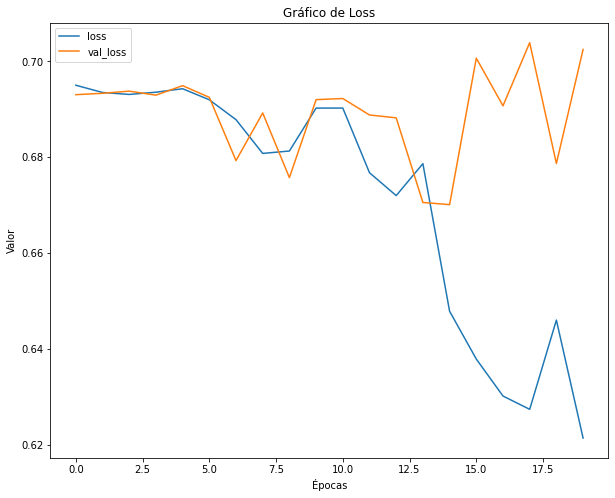

In [ ]:
plt.figure(figsize=(10,8))
plt.title(f"Gráfico de Loss")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

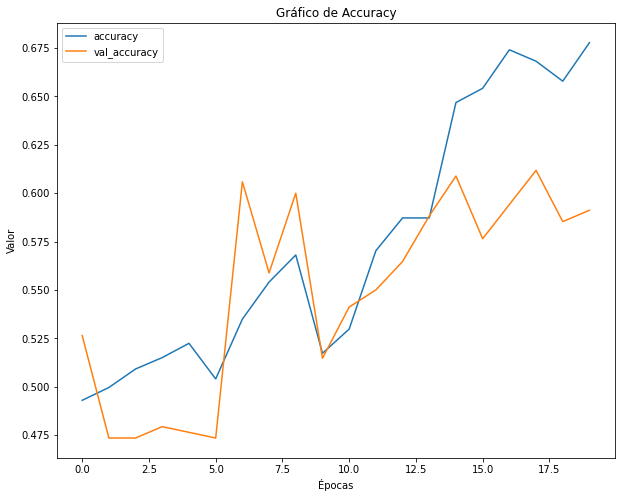

In [ ]:
plt.figure(figsize=(10,8))
plt.title(f"Gráfico de Accuracy")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
#Predict do modelo
y_pred = np.argmax(model.predict(x_test), axis=1)

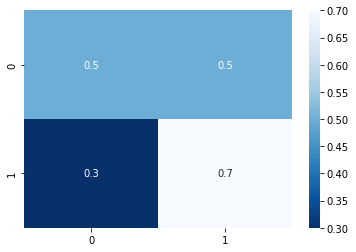

In [ ]:
#Matriz de Confusão da classificação do modelo
cm = confusion_matrix(y_test.argmax(axis=1), y_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues_r')

In [ ]:
#Outras métricas de avaliação
print(classification_report(y_test.argmax(axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.62      0.50      0.56       150
           1       0.58      0.70      0.64       150

    accuracy                           0.60       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.60      0.60      0.60       300



In [ ]:
#Criando dataframes para os comentários de teste e seus respectivos predicts
df_pred = pd.DataFrame(data=X_test_df)
df_pred_y = pd.DataFrame(data=y_pred, columns=['Predict'])

In [ ]:
#Concatenando os datasets
df_predict = pd.concat([df_pred, df_pred_y], axis=1, ignore_index=True)
df_predict.columns = ['Comentarios', 'Predict']
df_predict

,Comentarios,Predict
0,foi meu primeiro contato literário com o autor...,0
1,meu box chegou com alguma bolhas nas capas de ...,1
2,diante de tantos comentários espinafrando a ve...,1
3,boa estória quis ler antes de ver o filme que ...,0
4,se você pretende ler esse livro obviamente eu ...,0
...,...,...
295,que casal é esse gente você inicia o livro que...,1
296,um livro prático com ótimas dicas e exemplos r...,0
297,a obra de arthur conan doyale é simplesmente e...,1
298,livro que deveria ser lido por todos principal...,1


In [ ]:
#Mostrando algumas classificações
for i in range(0,11):
  print('Comentário', i,':', df_predict['Comentarios'][i])
  print('Predict', i,':', df_predict['Predict'][i])

Comentário 0 : foi meu primeiro contato literário com o autor e achei o livro bastante superficial não acrescentou muita informação nova 
Predict 0 : 0
Comentário 1 : meu box chegou com alguma bolhas nas capas de alguns livros e a orelha de um dos livros está bem surrada 
Predict 1 : 1
Comentário 2 : diante de tantos comentários espinafrando a versão digital para o kindle pela má formatação e pela falta de respeito ao consumidor de obras vendidas através da amazon com tantos problemas tomei a decisão de comprar a versão impressa papel li todos os comentários e um mais recente de maio de 2014 relata que o problema permanece lamentável 
Predict 2 : 1
Comentário 3 : boa estória quis ler antes de ver o filme que na época fez sucesso a experiência de usar o glossário na versão digital foi massacrante pois tinha que marcar a página para voltar onde tinha parado e a linguagem diferente causava confusão ao tentar continuar a leitura tendo muitas vezes que reler a frase ou parágrafo 
Predict 3 

In [ ]:
#Criando um comentário negativo
frase = ['Esse livro é péssimo, me arrependo de pagar 56 reais nisso']
frase = tokenization.texts_to_sequences(frase)
frase_pad = sequence.pad_sequences(frase,maxlen= 300)

In [ ]:
#Classificando o comentário criado
#Classe 0 = Positivo
#Classe 1 = Negativo
frase_pred = model.predict(frase_pad)
frase_pred.argmax()

1

In [ ]:
#Criando um comentário positvo
frase2 = ['Me impressionei bastante com essa obra. Achava que ia ser mais um clichê entediante porem acabou sendo muito bom e divertido']
frase2 = tokenization.texts_to_sequences(frase2)
frase2_pad = sequence.pad_sequences(frase2,maxlen= 300)

In [ ]:
#Classificando o comentário criado
frase_pred2 = model.predict(frase2_pad)
frase_pred2.argmax()

1

In [ ]:
#Salvando o modelo
model.save('LSTM_model.h5')

#GRU

In [ ]:
# Realizando a divisão dos dados de treino e teste 
# O tamanho do conjunto de teste é definido com 25% do total de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size = 0.25)

In [ ]:
#Salvando os comentários de teste
X_test_df = pd.DataFrame(X_test, columns=['Comentários'])

In [ ]:
print('X_train dimension:', X_train.shape)
print('y_train dimension:', y_train.shape)
print('X_test dimension:', X_test.shape)
print('y_test dimension:', y_test.shape)

X_train dimension: (1499,)
y_train dimension: (1499,)
X_test dimension: (500,)
y_test dimension: (500,)


In [ ]:
#Realizando a tokenização 
qnt_token = 30000
max_sequence_length = 100
tokenizer = Tokenizer(num_words = qnt_token)

#Criando um vocabulário com os texto do treinamento
tokenizer.fit_on_texts(list(X_train))

#Convertendo os textos para uma sequência de inteiros
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
         
#Fixando o tamanho da sequência em um tamanho único
X_train_pad  = pad_sequences(X_train_seq, maxlen = max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen = max_sequence_length)

In [ ]:
#Novo tamanho dos dados de treino
X_train_pad.shape

(1499, 100)

In [ ]:
word_index = tokenizer.word_index
size_of_vocabulary = len(tokenizer.word_index) + 1 #+1 for padding
size_of_vocabulary

10739

In [ ]:
# Exibindo o tamanho do vocabulário
size_of_vocabulary

10739

In [ ]:
# Utilizando LabelEncoder para converter as labels para inteiros
encoder = preprocessing.LabelEncoder()
encoder.fit(list(y_train) + list(y_test)) 
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
# Binarizando as classes
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [ ]:
print('New dimensions')
print('X_train dimension:', X_train.shape)
print('y_train dimension:', y_train.shape)
print('X_test dimension:', X_test.shape)
print('y_test dimension:', y_test.shape)

New dimensions
X_train dimension: (1499,)
y_train dimension: (1499, 2)
X_test dimension: (500,)
y_test dimension: (500, 2)


In [ ]:
# Criação do modelo de GRU
GRU = keras.Sequential()

# Camada de Embedding 
GRU.add(layers.Embedding(size_of_vocabulary, 200,
                        input_length = X_train_pad.shape[1],
                        trainable = False)) 
GRU.add(layers.SpatialDropout1D(0.3))
GRU.add(layers.GRU(200, recurrent_dropout = 0.3, return_sequences = True))
GRU.add(layers.GRU(200, recurrent_dropout = 0.3))
GRU.add(layers.Dense(512, activation = 'relu'))

GRU.add(layers.Dense(128, activation = 'relu')) 

GRU.add(layers.Dense(64, activation = 'relu')) 

GRU.add(layers.Dense(32, activation = 'relu'))

GRU.add(layers.Dense(num_classes, activation = 'softmax')) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 200)          2147800   
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 200)         0         
 ropout1D)                                                       
                                                                 
 gru (GRU)                   (None, 100, 200)          241200    
                                                                 
 gru_1 (GRU)                 (None, 200)               241200    
                                                                 
 dense_4 (Dense)             (None, 512)               102912    
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                        

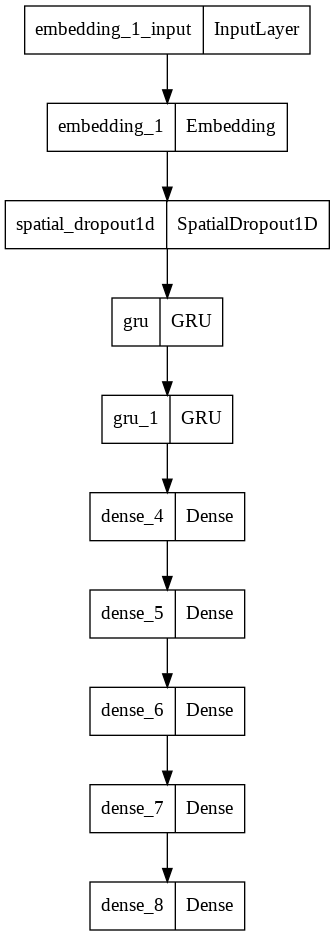

In [ ]:
GRU.summary()
plot_model(GRU)

In [ ]:
# Definição dos callbacks
callback_earlier = keras.callbacks.EarlyStopping(patience=5)
reduce_lr =  keras.callbacks.ReduceLROnPlateau(patience=5)
callback = [callback_earlier, reduce_lr ]

In [ ]:
GRU.compile(optimizer = 'adamax', 
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy']) 

In [ ]:
#Treinamento
GRU_history = GRU.fit(X_train_pad, y_train, batch_size = 184, epochs = 50, validation_split=0.25, callbacks=callback)

Epoch 1/50
7/7 [==============================] - 9s 788ms/step - loss: 0.6932 - accuracy: 0.4964 - val_loss: 0.6928 - val_accuracy: 0.5040 - lr: 0.0010
Epoch 2/50
7/7 [==============================] - 5s 653ms/step - loss: 0.6921 - accuracy: 0.5979 - val_loss: 0.6920 - val_accuracy: 0.5280 - lr: 0.0010
Epoch 3/50
7/7 [==============================] - 4s 642ms/step - loss: 0.6899 - accuracy: 0.5276 - val_loss: 0.6899 - val_accuracy: 0.5120 - lr: 0.0010
Epoch 4/50
7/7 [==============================] - 4s 633ms/step - loss: 0.6846 - accuracy: 0.6103 - val_loss: 0.6859 - val_accuracy: 0.5440 - lr: 0.0010
Epoch 5/50
7/7 [==============================] - 5s 668ms/step - loss: 0.6761 - accuracy: 0.6406 - val_loss: 0.6830 - val_accuracy: 0.5573 - lr: 0.0010
Epoch 6/50
7/7 [==============================] - 5s 643ms/step - loss: 0.6616 - accuracy: 0.6335 - val_loss: 0.6668 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 7/50
7/7 [==============================] - 4s 639ms/step - loss: 0.6414 - a

In [ ]:
# Avaliação do modelo
GRU.evaluate(X_test_pad, y_test)

16/16 [==============================] - 1s 61ms/step - loss: 0.5870 - accuracy: 0.7000


[0.5870062708854675, 0.699999988079071]

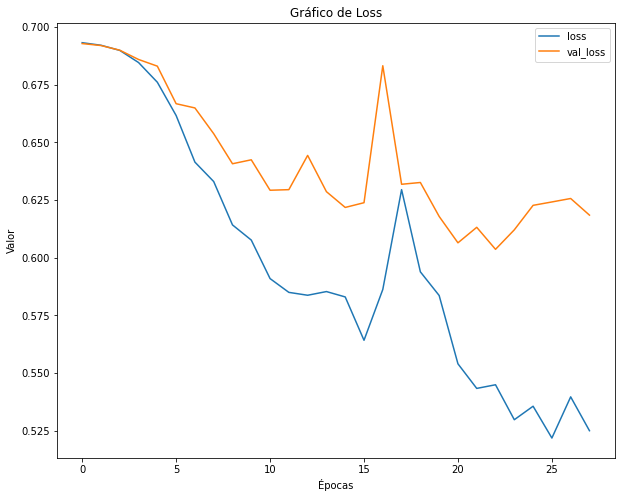

In [ ]:
plt.figure(figsize=(10,8))
plt.title(f"Gráfico de Loss")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(GRU_history.history['loss'], label="loss")
plt.plot(GRU_history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

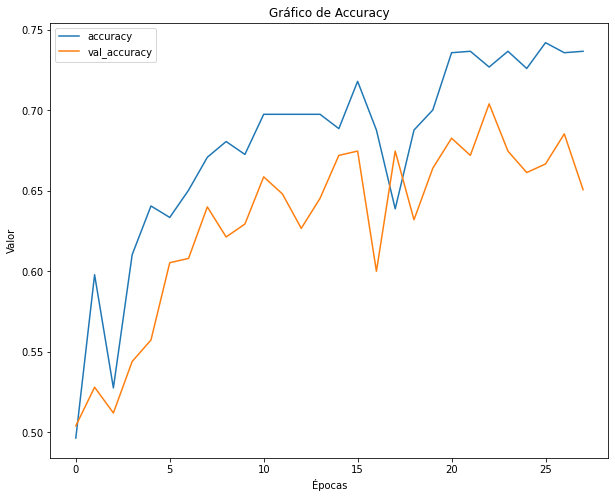

In [ ]:
plt.figure(figsize=(10,8))
plt.title(f"Gráfico de Accuracy")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(GRU_history.history['accuracy'], label="accuracy")
plt.plot(GRU_history.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
y_pred = np.argmax(GRU.predict(X_test_pad), axis=1)
y_test = np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       245
           1       0.75      0.61      0.68       255

    accuracy                           0.70       500
   macro avg       0.71      0.70      0.70       500
weighted avg       0.71      0.70      0.70       500



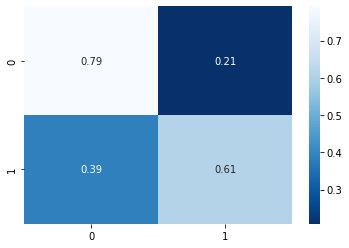

In [ ]:
#Matriz de Confusão da classificação do modelo
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues_r')

In [ ]:
#Resetando o Index da variável de teste 
X_test_df = X_test_df.reset_index(drop=True)
X_test_df

,Comentários
0,excelente a ficção se faz real nos dias atuais...
1,é muito bom quando lemos um livro com um conte...
2,mais um livro pra falar mal do cristianismo e ...
3,livro muito fraco quanta baboseira imaginava q...
4,a história é até ok mas o autor se perde em de...
...,...
495,muito narrativo não prende atenção tive aprend...
496,rita se mostra por inteiro fantástica auto bio...
497,decepção quando to ansioso abri a caixa e vi a...
498,que livro maravilhoso heitor e sofia começam a...


In [ ]:
#Criando dataframes para os comentários de teste e seus respectivos predicts
df_pred = pd.DataFrame(data=X_test_df)
df_pred_y = pd.DataFrame(data=y_pred, columns=['Predict'])

In [ ]:
#Concatenando os datasets
df_predict = pd.concat([df_pred, df_pred_y], axis=1, ignore_index=True)
df_predict.columns = ['Comentarios', 'Predict']
df_predict

,Comentarios,Predict
0,excelente a ficção se faz real nos dias atuais...,0
1,é muito bom quando lemos um livro com um conte...,1
2,mais um livro pra falar mal do cristianismo e ...,0
3,livro muito fraco quanta baboseira imaginava q...,0
4,a história é até ok mas o autor se perde em de...,1
...,...,...
495,muito narrativo não prende atenção tive aprend...,0
496,rita se mostra por inteiro fantástica auto bio...,1
497,decepção quando to ansioso abri a caixa e vi a...,0
498,que livro maravilhoso heitor e sofia começam a...,1


In [ ]:
#Mostrando algumas classificações
for i in range(0,11):
  print('Comentário', i,':', df_predict['Comentarios'][i])
  print('Predict', i,':', df_predict['Predict'][i])

Comentário 0 : excelente a ficção se faz real nos dias atuais onde a utopia fraquejou e fracassou também se aplica a lugares que mergulharam na desarticulação do sonho possível o livro é referência deu origem à bela produção de truffault e é citado e comentado no filme inglês a livraria a temática remete a obras icônicas como admirável mundo novo 1984 e outros tantos que anunciaram a inversão de valores e o domínio da prepotência e do arbítrio no fim a ideia de que o absurdo pode se fazer real e assombrar a nossa sobrevivência a nossa capacidade de resistência 
Predict 0 : 0
Comentário 1 : é muito bom quando lemos um livro com um conteúdo interessante chegamos a ficar tristes ao percebermos que estamos chegando ao final de sua leitura sentimos isso pois o que estamos lendo é gostoso de ler expande a nossa visão de mundo nos dá um poder que antes achávamos que não tínhamos no caso desse livro o autor nos prova que sim podemos mudar nossos hábitos os bons e os ruins ele mostra também que

In [ ]:
#Criando um comentário negativo
frase = ['Esse livro é péssimo, me arrependo de pagar 56 reais nisso']
frase = tokenizer.texts_to_sequences(frase)
frase_pad = sequence.pad_sequences(frase,maxlen= 100)

In [ ]:
#Classificando o comentário criado
#Classe 0 = Negativo
#Classe 1 = Positivo
frase_pred = GRU.predict(frase_pad)
frase_pred.argmax()

0

In [ ]:
#Criando um comentário positvo
frase2 = ['Me impressionei bastante com essa  obra. Achava que ia ser mais um clichê entediante porem acabou sendo muito bom e divertido']
frase2 = tokenizer.texts_to_sequences(frase2)
frase2_pad = sequence.pad_sequences(frase2,maxlen= 100)

In [ ]:
#Classificando o comentário criado
frase_pred2 = GRU.predict(frase2_pad)
frase_pred2.argmax()

0

In [ ]:
#Salvando o modelo
GRU.save('GRU_model.h5')

#LSTM Bidirecional 

In [ ]:
#Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, shuffle=True, test_size=0.3)

In [ ]:
#Salvando os comentários de teste
X_test_df = pd.DataFrame(X_test, columns=['Comentários'])

In [ ]:
#Definindo um Tokenizer
tokenization = text.Tokenizer(num_words=10000,lower=True)

In [ ]:
#Transformando os X's em sequencias numéricas
tokenization.fit_on_texts(list(X_train)+list(X_test))
X_train = tokenization.texts_to_sequences(X_train)
X_test = tokenization.texts_to_sequences(X_test)
x_train = sequence.pad_sequences(X_train, maxlen=300)
x_test = sequence.pad_sequences(X_test, maxlen=300)

In [ ]:
#To categorical para os y's
y_train = np.where(y_train == "positivo", 1, 0)
y_test = np.where(y_test == "positivo", 1, 0)
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test,2)

In [ ]:
#Modelo LSTM Bidirectional
inputs = Input(shape=(300,))
x = inputs
x = Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[pretrained_weights], trainable = False)(x)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(LSTM(200))(x)
x = Dropout(0.2)(x)
out = Dense(2, activation='softmax')(x)

Bidirectional_model = keras.Model(inputs, out, name='Model')

In [ ]:
#Sumamry do modelo
Bidirectional_model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 300, 300)          3819000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 300, 300)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 400)              801600    
 l)                                                              
                                                                 
 dropout_4 (Dropout)         (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 2)                 802   

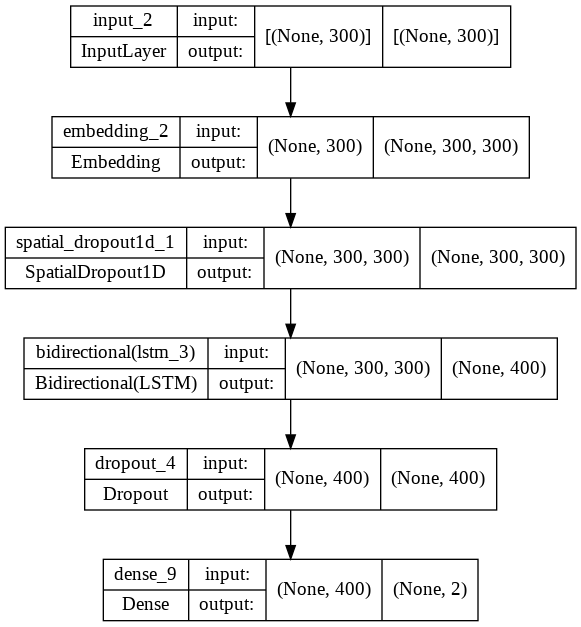

In [ ]:
#Plotagem do modelo
plot_model(Bidirectional_model, show_shapes=True)

In [ ]:
#Compile
Bidirectional_model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
#Limpar Backend
tf.keras.backend.clear_session()

In [ ]:
#Treinamendo do modelo
hist = Bidirectional_model.fit(x_train, y_train,
                 epochs = 50, 
                 batch_size = 100,
                 validation_split=0.20,
                 verbose=1,
                 callbacks=[keras.callbacks.EarlyStopping(patience=3), keras.callbacks.ReduceLROnPlateau()])

Epoch 1/50
12/12 [==============================] - 5s 147ms/step - loss: 0.7105 - accuracy: 0.5380 - val_loss: 0.6549 - val_accuracy: 0.5929 - lr: 0.0010
Epoch 2/50
12/12 [==============================] - 1s 77ms/step - loss: 0.5877 - accuracy: 0.7087 - val_loss: 0.5811 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 3/50
12/12 [==============================] - 1s 79ms/step - loss: 0.4891 - accuracy: 0.7685 - val_loss: 0.4833 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 4/50
12/12 [==============================] - 1s 79ms/step - loss: 0.4337 - accuracy: 0.8097 - val_loss: 0.4845 - val_accuracy: 0.7571 - lr: 0.0010
Epoch 5/50
12/12 [==============================] - 1s 79ms/step - loss: 0.3783 - accuracy: 0.8463 - val_loss: 0.4772 - val_accuracy: 0.7821 - lr: 0.0010
Epoch 6/50
12/12 [==============================] - 1s 79ms/step - loss: 0.3284 - accuracy: 0.8651 - val_loss: 0.5127 - val_accuracy: 0.7714 - lr: 0.0010
Epoch 7/50
12/12 [==============================] - 1s 79ms/step - loss: 0.

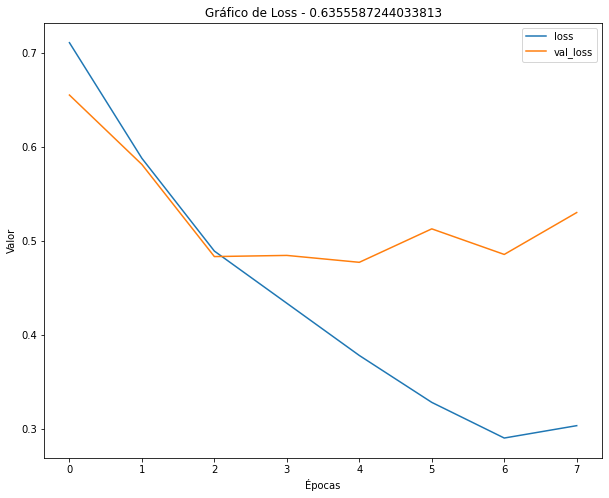

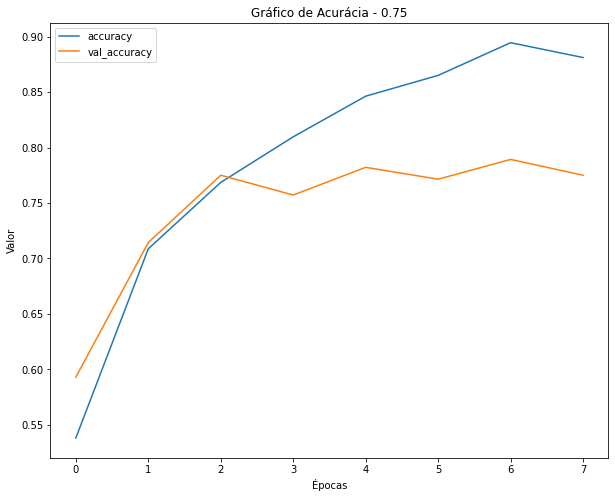

In [ ]:
# Evaluate do modelo
scores = Bidirectional_model.evaluate(x_test, y_test, verbose=0)

# Gráfico de loss
plt.figure(figsize=(10,8))
plt.title(f"Gráfico de Loss - {scores[0]}")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

# Gráfico de acurácia
plt.figure(figsize=(10,8))
plt.title(f"Gráfico de Acurácia - {scores[1]}")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(hist.history['accuracy'], label="accuracy")
plt.plot(hist.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
#Predict do modelo
pred = Bidirectional_model.predict(x_test)
pred = np.round(pred)

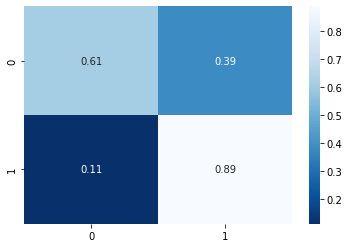

In [ ]:
#Matriz de confusão
cm = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1), normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues_r')

In [ ]:
#Outras métricas
print(classification_report(y_test.argmax(axis=1), pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.84      0.61      0.71       300
           1       0.70      0.89      0.78       300

    accuracy                           0.75       600
   macro avg       0.77      0.75      0.75       600
weighted avg       0.77      0.75      0.75       600



In [ ]:
#Criando dataframes para os comentários de teste e seus respectivos predicts
df_pred = pd.DataFrame(data=X_test_df)
df_pred_y = pd.DataFrame(data=pred.argmax(axis=1), columns=['Predict'])

In [ ]:
#Concatenando os datasets
df_predict = pd.concat([df_pred, df_pred_y], axis=1, ignore_index=True)
df_predict.columns = ['Comentarios', 'Predict']
df_predict

,Comentarios,Predict
0,até onde o ser humano pode chegar em termos de...,0
1,livro maravilhoso historia envolvente com pita...,1
2,um relato encantador e carismático cheio de se...,1
3,mulheres todas elas este livro precisa ser lid...,0
4,achei muito merchandising e pouco conteúdo prá...,1
...,...,...
595,o eterno clássico o pequeno príncipe vai além ...,1
596,fahrenheit 451 é uma distopia escrita no sécul...,1
597,o título sinopse e autor desse livro me fizera...,1
598,confesso que o fato do biografado ser uma figu...,1


In [ ]:
#Mostrando algumas classificações
for i in range(0,11):
  print('Comentário', i,':', df_predict['Comentarios'][i])
  print('Predict', i,':', df_predict['Predict'][i])

Comentário 0 : até onde o ser humano pode chegar em termos de maldade de desumanidade e por outro lado nos atos de coragem bravura determinação e heroísmo em combater o mal este livro mostra muito disso apenas alguns números que são citados não parecem corretos por exemplo o número de baixas de soldados americanos no desembarque na normandia no dia d de resto não hã como não qualificar com cinco estrelas 
Predict 0 : 0
Comentário 1 : livro maravilhoso historia envolvente com pitadas hot e de comedia não da vontade de parar de ler cada capitulo mas maravilhoso que o outro
Predict 1 : 1
Comentário 2 : um relato encantador e carismático cheio de sentimentos reais e humanidade michelle parece perceber tudo e todos ao redor com olhar empático de acolher e disciplinar na medida da necessidade uma mulher que poderia e deveria ser presidente do mundo apaixonada por sua inteligência e força recomendado a todos 
Predict 2 : 1
Comentário 3 : mulheres todas elas este livro precisa ser lido e relid

In [ ]:
#Criando um comentário negativo
frase = ['Esse livro é péssimo, me arrependo de pagar 56 reais nisso']
frase = tokenization.texts_to_sequences(frase)
frase_pad = sequence.pad_sequences(frase,maxlen= 300)

In [ ]:
#Classificando o comentário criado
#Classe 0 = Negativo
#Classe 1 = Positivo
frase_pred = Bidirectional_model.predict(frase_pad)
frase_pred.argmax()

0

In [1]:
#Criando um comentário positvo
frase2 = ['Me impressionei bastante com essa obra. Achava que ia ser mais um clichê entediante porem acabou sendo muito bom e divertido']
frase2 = tokenization.texts_to_sequences(frase2)
frase2_pad = sequence.pad_sequences(frase2,maxlen= 300)

NameError: ignored

In [ ]:
#Classificando o comentário criado
frase_pred2 = Bidirectional_model.predict(frase2_pad)
frase_pred2.argmax()

1

In [ ]:
#Salvando o modelo
model.save('Bidirectional_model.h5')